In [100]:
import os

print("Now we are in: ", os.getcwd())


Now we are in:  /Users/g-2024/gitRepos/Mit-Python/jupyterLaunch


In [101]:
import urllib.request
url = "https://raw.githubusercontent.com/Buntin-Liz/Mit-Python/main/springData.txt"
urllib.request.urlretrieve(url, "springData.txt")



('springData.txt', <http.client.HTTPMessage at 0x11c47b450>)

In [102]:
import pylab

In [103]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() # Ignore header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)


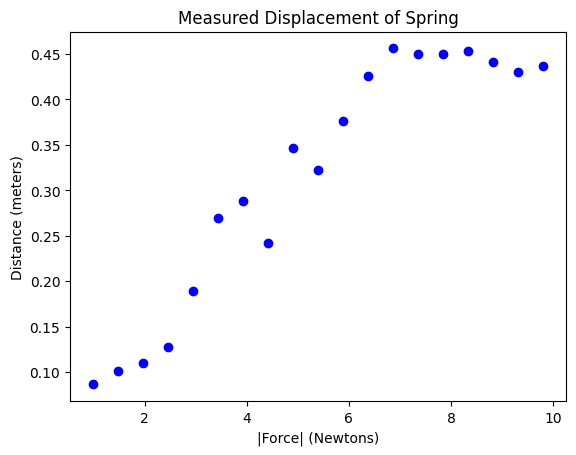

In [104]:

def plotData(fileName):
    masses, distances = getData(fileName)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
                label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

plotData('springData.txt')

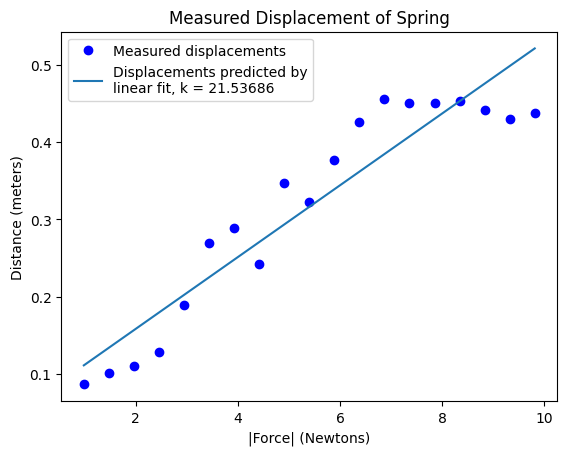

In [105]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*forces + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label=f'Displacements predicted by\nlinear fit, k = {round(k, 5)}')
    pylab.legend(loc='best')

fitData('springData.txt')

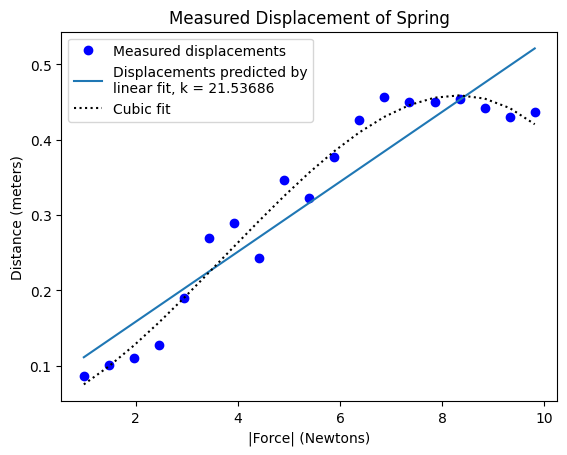

In [106]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*forces + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label=f'Displacements predicted by\nlinear fit, k = {round(k, 5)}')
    fit = pylab.polyfit(forces, distances, 3)
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces, predictedDistances, 'k:', label='Cubic fit')
    pylab.legend(loc='best')

fitData('springData.txt')

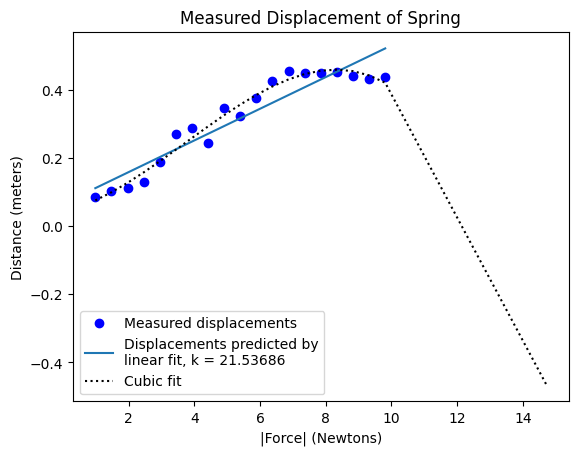

In [107]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*forces + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label=f'Displacements predicted by\nlinear fit, k = {round(k, 5)}')
    fit = pylab.polyfit(forces, distances, 3)
    #append 1.5kg mass
    forces = pylab.append(forces, 1.5*9.81)
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces, predictedDistances, 'k:', label='Cubic fit')
    pylab.legend(loc='best')

fitData('springData.txt')

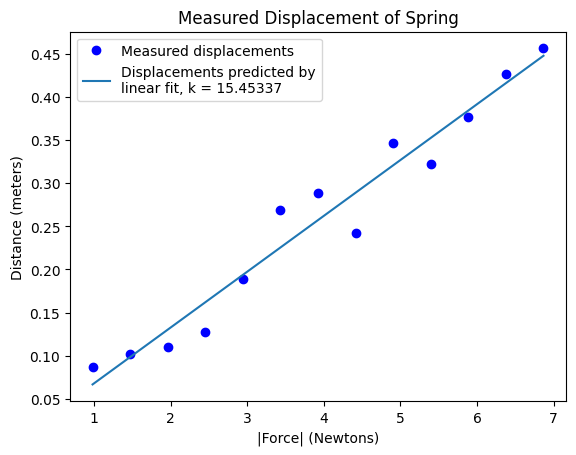

In [108]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances[:-6])
    masses = pylab.array(masses[:-6])
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*forces + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label=f'Displacements predicted by\nlinear fit, k = {round(k, 5)}')
    pylab.legend(loc='best')

fitData('springData.txt')

In [109]:
url = "https://raw.githubusercontent.com/Buntin-Liz/Mit-Python/main/launcherData.txt"
urllib.request.urlretrieve(url, "launcherData.txt")


('launcherData.txt', <http.client.HTTPMessage at 0x11cd44a10>)

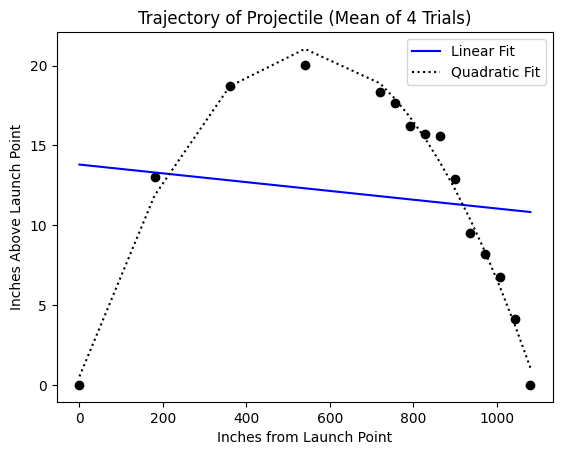

In [128]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    height1,height2,height3,height4 = [],[],[],[]
    dataFile.readline() #
    for line in dataFile:
        d, h1,h2,h3,h4 = line.split()
        distances.append(float(d))
        height1.append(float(h1))
        height2.append(float(h2))
        height3.append(float(h3))
        height4.append(float(h4))
    dataFile.close()
    return (distances,[height1,height2,height3,height4])

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/numTrials
    pylab.title(f'Trajectory of Projectile (Mean of {numTrials} Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    fit = pylab.polyfit(distances, meanHeights, 1)#直線適合
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'b', label='Linear Fit')
    fit = pylab.polyfit(distances, meanHeights, 2)#2次関数による適合
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'k:', label='Quadratic Fit')
    pylab.legend()

processTrajectories('launcherData.txt')

In [111]:
def rSquared(measured, predicted):
    """measured: 観測値を保持する1次元配列
    predicted: 予測値を保持する1次元配列
    returns: R^2
    """
    estimateError = ((predicted - measured)**2).sum()
    meanOfMeasured = measured.sum()/len(measured)
    variability = ((measured - meanOfMeasured)**2).sum()
    return 1 - estimateError/variability


RSquare of linear fit =  0.0177433205440769
RSquare of quadratic fit =  0.9857653692869693


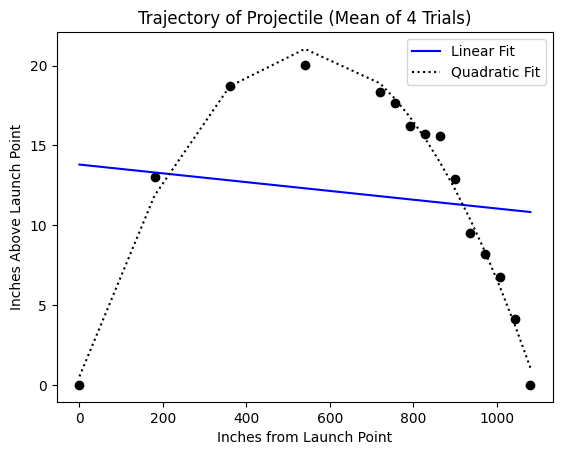

In [112]:
def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/numTrials
    pylab.title(f'Trajectory of Projectile (Mean of {numTrials} Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    fit = pylab.polyfit(distances, meanHeights, 1)#直線適合
    altitudes = pylab.polyval(fit, distances)
    print('RSquare of linear fit = ', rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'b', label='Linear Fit')
    fit = pylab.polyfit(distances, meanHeights, 2)#2次関数による適合
    altitudes = pylab.polyval(fit, distances)
    print('RSquare of quadratic fit = ', rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'k:', label='Quadratic Fit')
    pylab.legend()

processTrajectories('launcherData.txt')

In [113]:
def getHorizontalSpeed( quadFit,minX,maxX):
    """
    quadFit: 2次関数の係数を保持する1次元配列
    minX: インチ単位の距離
    maxX: インチ単位の距離
    returns: 水平方向の速度
    """
    inchesPerFoot = 12
    xMid = (maxX - minX)/2
    a, b, c = quadFit[0],quadFit[1],quadFit[2]
    yPeak = a*xMid**2 + b*xMid + c
    g = 32.16*inchesPerFoot
    t = ((2*yPeak)/g)**0.5
    print('Horizontal speed = ', int((xMid)/(t*inchesPerFoot)) , 'inches/sec')

Horizontal speed =  136 inches/sec


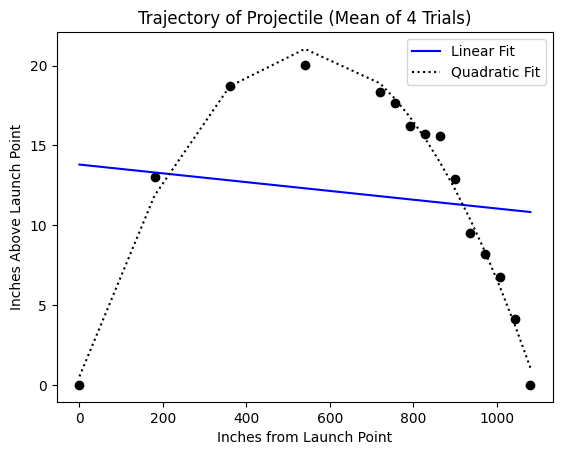

In [118]:
def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/numTrials
    pylab.title(f'Trajectory of Projectile (Mean of {numTrials} Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    fit = pylab.polyfit(distances, meanHeights, 1)#直線適合
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'b', label='Linear Fit')
    fit = pylab.polyfit(distances, meanHeights, 2)#2次関数による適合
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'k:', label='Quadratic Fit')
    pylab.legend()
    getHorizontalSpeed(fit, distances[-1],distances[0])

processTrajectories('launcherData.txt')

Model predicts that 3**20 is roughly 2.454782763721238e+48
Actual value of 3**20 is 3486784401


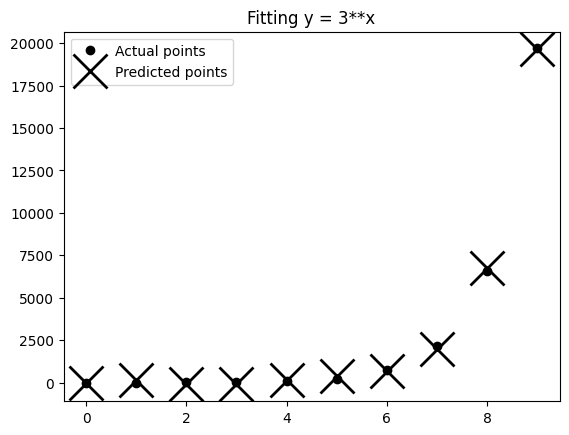

In [121]:
vals = []

for i in range(10):
    vals.append(3**i)
pylab.plot(vals,'ko',label='Actual points')
xVals = pylab.arange(10)
fit = pylab.polyfit(xVals,vals,5)
yVals = pylab.polyval(fit,xVals)
pylab.plot(yVals,'kx',label='Predicted points',markeredgewidth = 2,markersize = 25)
pylab.title('Fitting y = 3**x')
pylab.legend(loc = 'upper left')

print('Model predicts that 3**20 is roughly',pylab.polyval(fit,[3**20])[0])
print('Actual value of 3**20 is',3**20)

[]

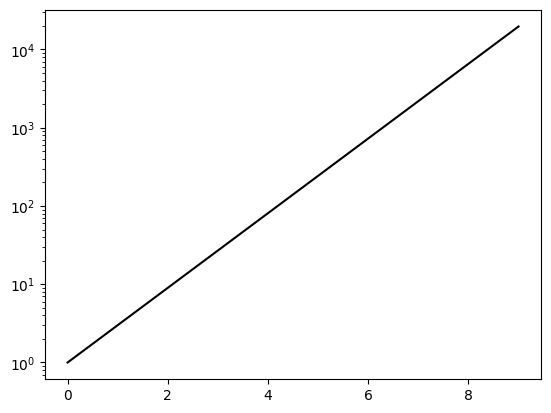

In [125]:
xVals, yVals = [], []
for i in range(10):
    xVals.append(i)
    yVals.append(3**i)
pylab.plot(xVals,yVals,'k')
pylab.semilogy()

[array([1.]), array([3.]), array([9.]), array([27.]), array([81.]), array([243.]), array([729.]), array([2187.]), array([6561.]), array([19683.])]
f(20) =  3486784401
Predicted value =  3486784401


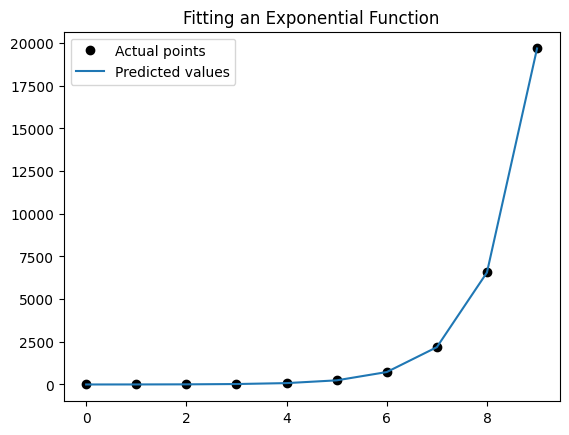

In [132]:
import math

def createData(f,xVals):
    """f: 1引数の関数
    xVals: x値を保持する1次元配列
    returns: f(x)の値を保持する1次元配列
    """
    yVals = []
    for i in xVals:
        yVals.append(f(i))
    return pylab.array(yVals)

def fitExpData(xVals,yVals):
    logVals = []
    for y in yVals:
        logVals.append(math.log(y,2.0))
    fit = pylab.polyfit(xVals,logVals,1)
    return fit,2.0

xVals = range(10)
f = lambda x:3**x
yVals = createData(f,xVals)
pylab.plot(xVals,yVals,'ko',label = 'Actual points')
fit,base = fitExpData(xVals,yVals)
predictedYVals = []
for x in xVals:
    predictedYVals.append(base**pylab.polyval(fit,[x]))
pylab.plot(xVals,predictedYVals,label = 'Predicted values')
pylab.title('Fitting an Exponential Function')
pylab.legend(loc = 'upper left')
#オリジナルデータには無いx値を予測する
print('f(20) = ',f(20))
print('Predicted value = ', int(base**(pylab.polyval(fit,[20]))))

f(20) =  3486784421
Predicted value =  2734037145


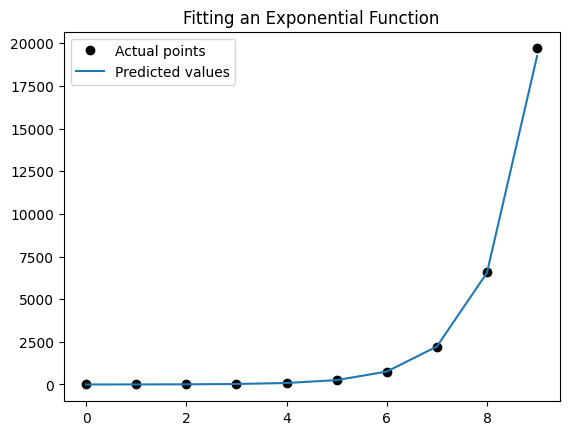

In [127]:
xVals = range(10)
f = lambda x:3**x+x
yVals = createData(f,xVals)
pylab.plot(xVals,yVals,'ko',label = 'Actual points')
fit,base = fitExpData(xVals,yVals)
predictedYVals = []
for x in xVals:
    predictedYVals.append(base**pylab.polyval(fit,[x]))
pylab.plot(xVals,predictedYVals,label = 'Predicted values')
pylab.title('Fitting an Exponential Function')
pylab.legend(loc = 'upper left')
#オリジナルデータには無いx値を予測する
print('f(20) = ',f(20))
print('Predicted value = ', int(base**(pylab.polyval(fit,[20]))))